# Data Analytics : Assignment 3. 



## Question 1: Download the [Kaggle Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques#evaluation)

### Answer:

Read the train.csv file into a pandas dataframe. After uploading our dataset, we will remove all rows whose GrLivArea is more 4000 sqft. This procedure has been recommended by the creator of the dataset [Dean De Cook](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf)



In [563]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")
train = train[train.GrLivArea<4000]


## Question 2 : Parse the data to automatically extract the following attributes : MSZoning, LotFrontage, LotArea, Alley, OverallQual, YearBuilt, RoofStyle, Exterior1st, ExterCond, CentralAir, HalfBath

In [564]:
selected_attributes = [ "MSZoning", "LotFrontage", "LotArea", 
                       "Alley", "OverallQual", "YearBuilt", "RoofStyle", "Exterior1st",
                       "ExterCond", "CentralAir", "HalfBath"]
train[selected_attributes].head()

,MSZoning,LotFrontage,LotArea,Alley,OverallQual,YearBuilt,RoofStyle,Exterior1st,ExterCond,CentralAir,HalfBath
0,RL,65.0,8450,NaN,7,2003,Gable,VinylSd,TA,Y,1
1,RL,80.0,9600,NaN,6,1976,Gable,MetalSd,TA,Y,0
2,RL,68.0,11250,NaN,7,2001,Gable,VinylSd,TA,Y,1
3,RL,60.0,9550,NaN,7,1915,Gable,Wd Sdng,TA,Y,0
4,RL,84.0,14260,NaN,8,2000,Gable,VinylSd,TA,Y,1


In [565]:
train[selected_attributes].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 11 columns):
MSZoning       1456 non-null object
LotFrontage    1197 non-null float64
LotArea        1456 non-null int64
Alley          91 non-null object
OverallQual    1456 non-null int64
YearBuilt      1456 non-null int64
RoofStyle      1456 non-null object
Exterior1st    1456 non-null object
ExterCond      1456 non-null object
CentralAir     1456 non-null object
HalfBath       1456 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 136.5+ KB


#### Attribute  Types: 

Categorical: Alley, MSZoning,Exterior1st

Numerical Discrete : LotFrontage , LotArea

Numerical Continuous : 

Ordinal : OverallQual , HalfBath , ExterCond

#### Attribute Data Types: 

The .info() method allows us to see that the "Alley" and "LotFrontage" columns may suffer from missing values.This issue will be addressed before implementing the visual encoding for each attribute.






In [566]:
train[selected_attributes].describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,HalfBath
count,1197.000000,1456.000000,1456.000000,1456.00000,1456.000000
mean,69.693400,10448.784341,6.088599,1971.18544,0.381181
std,23.054474,9860.763449,1.369669,30.20159,0.502533
min,21.000000,1300.000000,1.000000,1872.00000,0.000000
25%,59.000000,7538.750000,5.000000,1954.00000,0.000000
50%,69.000000,9468.500000,6.000000,1972.00000,0.000000
75%,80.000000,11588.000000,7.000000,2000.00000,1.000000
max,313.000000,215245.000000,10.000000,2010.00000,2.000000


## Question 3 and 4 : Map and implement each attribute to a visual encoding . 

#### Answer: 
1. Import the data visualization library namely matplotlib and seaborn. 
2. Check for missing values in the "Alley"  and "MSZoning" column. 

In [567]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline




## 1. LotFrontage:  Linear feet of street connected to property

### How to interpret this attribute ? 

Lot Frontage determines how much noice and pollution might travel to the residence from the street. 
Upscale neighborhoods have considerably high values of this attribute. 

### How to solve the missing values issue : 

We have 259 missing values. The mean value in this column is 69 and the median value is 70. Hence we can infer that there are no large outliers in this column. For this reason, we made the decision to fill the missing values with the median.



In [568]:
train.LotFrontage.isnull().sum()

259

In [569]:
train.LotFrontage.median()

69.0

In [570]:
lot_mean = train.LotFrontage.mean()
train.LotFrontage = train.LotFrontage.fillna(lot_mean)


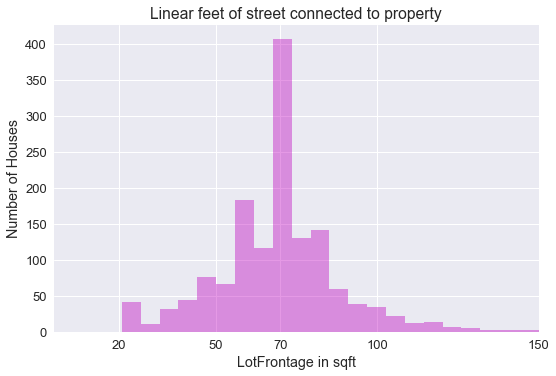

In [571]:
ticks = [20,50,70,100,150,200]
sns.set(font_scale = 1.3)
ax = sns.distplot(train.LotFrontage , kde = False ,color="m")
_ = ax.set_title('Linear feet of street connected to property')
_ = ax.set_xticks(ticks)
_ = ax.set_xlim(0,150)
_= ax.set(xlabel='LotFrontage in sqft', ylabel='Number of Houses')

plt.tight_layout()


# 2.LotArea : Lot size in square feet 

The lot area is one of the most important house property feature checked by usual home owners. Its unit measure is square feet. 

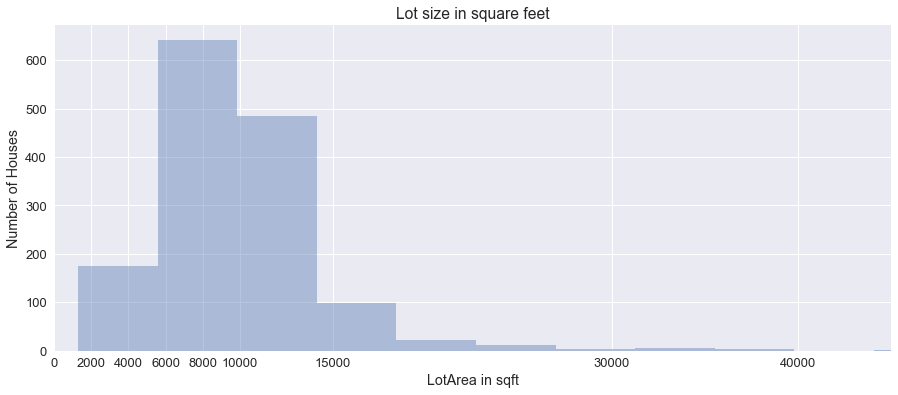

In [524]:
sns.set(font_scale=1.3)
ax = plt.subplots(figsize=(15, 6))
ax = sns.distplot(train.LotArea, kde = False)
_ = ax.set_title('Lot size in square feet')
_ = ax.set_xlim(0,45000)
_= ax.set(xlabel='LotArea in sqft', ylabel='Number of Houses')
_= ax.set_xticks([0,2000,4000,6000,8000,10000,15000,30000,40000])




# 3.MSZoning =  Identifies the general zoning classification of the sale.

MS Zoning describe the classification of the Residential District. 

A  = Agriculture

C  = Commercial

FV = Floating Village Residential 

I  = Industrial 

RH = Residential High Density

RL = Residential Low Density, which means that this is an upscle neighbourhood

RP = Residential Low Density Park 

RM = Residential Medium Density  

      


In [525]:
rl_perc = train["MSZoning"] == "RL"
len(train[rl_perc])/len(train)

0.7877747252747253

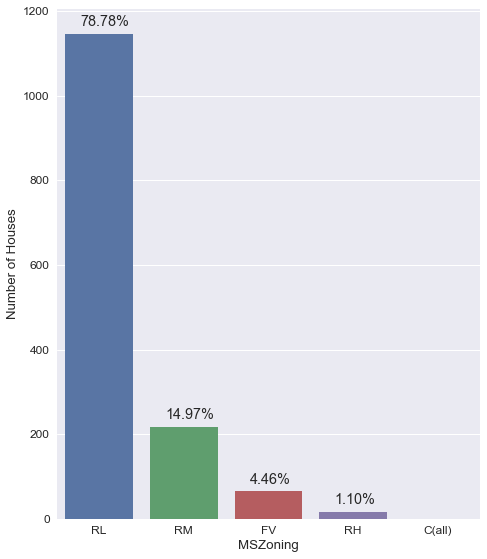

In [526]:
sns.set(font_scale = 1.2)
plt.subplots(figsize = (7,8))
labels = ["RL","RM", "FV", "RH","C(all)"]
ax= sns.countplot(x="MSZoning", data=train , order = labels )
_= ax.set(xlabel='MSZoning', ylabel='Number of Houses')
perc = train.MSZoning.value_counts(normalize = True).tolist()
perc = [ x*100 for x in perc]
for i, p in enumerate(ax.patches):
    ax.annotate('{0:.2f}%'.format(perc[i]), (p.get_x() + 0.18, p.get_height()+18))
plt.tight_layout()

# 4.Alley

This attribute refers to the type of alley access. When searching for NaN values, we found that 94 % of the observations were missing. However, when reading the dataset's description we found that NA means No ALley Access. Hence, we replaced the NA value by the string "No Alley Access". 

In [527]:
train.Alley.isnull().sum()/len(train)


0.9375

In [528]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [529]:
train.Alley = train.Alley.fillna("No alley access")


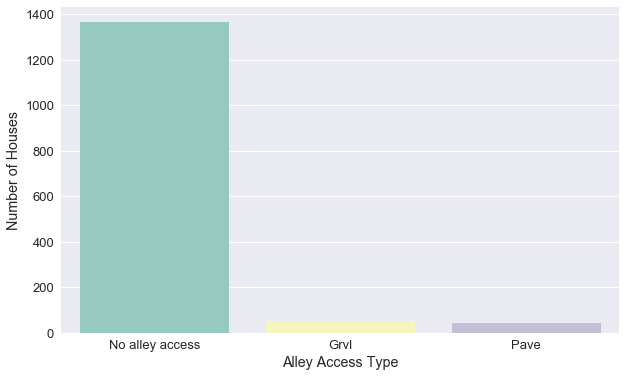

In [530]:
sns.set(font_scale=1.3)
ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="Alley", data=train, palette="Set3")
_ = ax.set_ylabel("Number of houses")
_= ax.set(xlabel='Alley Access Type', ylabel='Number of Houses')
ax = sns.set_style("ticks")




# 5.OverallQual: Rates the overall material and finish of the house

This attribute rates the overall material and finish of the house. It helps determine the maintenance costs that may be incurred by the home resident. This attribute is ordinal. A score of 10 describes a home in very excellent conditions and a score of 0 describes a house in very poor conditions. 
     

In [531]:
train.OverallQual[train.OverallQual > 5].count()/len(train)

0.63049450549450547

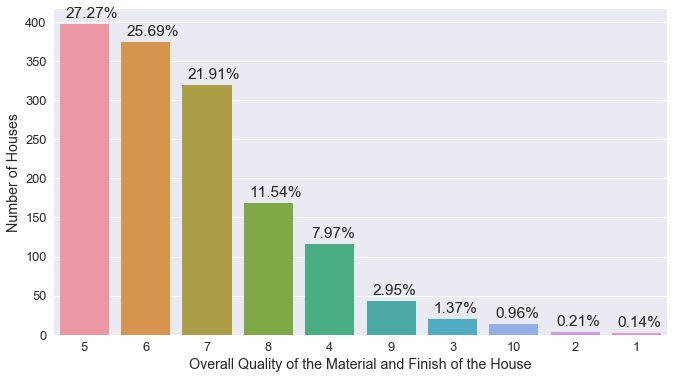

In [532]:
sns.set(font_scale = 1.29)
ax = plt.subplots(figsize=(11, 6))
labels = [5,6,7,8,4,9,3,10,2,1]
ax = sns.countplot(x="OverallQual", data=train, order = labels)
_ = ax.set_ylabel("Number of houses")
_= ax.set(xlabel='Overall Quality of the Material and Finish of the House', ylabel='Number of Houses')
perc = train.OverallQual.value_counts(normalize = True).tolist()
perc = [ x*100 for x in perc]
for i, p in enumerate(ax.patches):
    ax.annotate('{0:.2f}%'.format(perc[i]), (p.get_x() + 0.09, p.get_height()+8))


# 6. YearBuilt: Original construction date
This attribute describes when the house was originally built ? It has a significant influence on the house price. Since an old house would infer higher maintenance costs, unless the property holds significant influence. 


In [533]:
train.YearBuilt[train.YearBuilt > 2000].count()/len(train)

0.24862637362637363

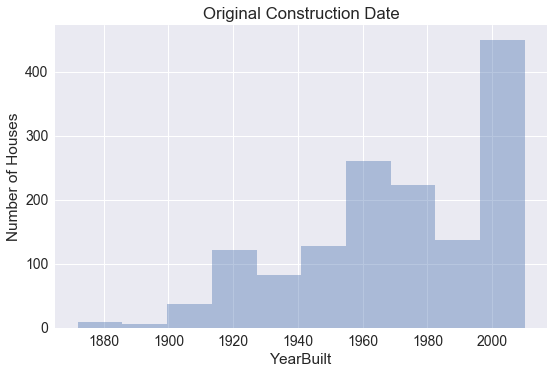

In [534]:
sns.set(font_scale = 1.4)
fig = sns.distplot(train["YearBuilt"], kde=False, bins=10)
_ = fig.set_title('Original Construction Date')
_ = fig.set_ylabel('Number of Houses')
ticks = [1970,1980,1990,2000,2010]

_= ax.set(xlabel='Year Built', ylabel='Number of Houses', xticks = ticks)
plt.tight_layout()




# 7. RoofStyle: 

RoofStyle describes the house's roof type. Since Gable and Hip are the most frequent roof types in our dataset, we decided to include an image showasing these roof types. 

     

In [535]:
train["RoofStyle"].value_counts()

Gable      1140
Hip         283
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

<img src="Hip-Roof-vs-Gable-Roof.jpg">

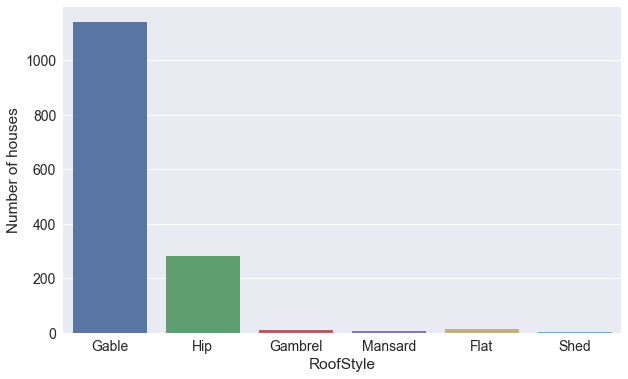

In [536]:
sns.set(font_scale = 1.4)
ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="RoofStyle", data=train)
_ = ax.set_ylabel("Number of houses")






# 8.Exterior1st: Exterior covering on house

This feature describes the exterior covering on the house. It is known as the [outer skin of the house](http://www.hgtv.com/remodel/outdoors/outfit-your-homes-exterior). Below is the explanation of each attribute. 

AsbShng = Asbestos Shingles

AsphShn	= Asphalt Shingles

BrkComm = Brick Common

BrkFace = Brick Face

CBlock  = Cinder Block

CemntBd	= Cement Board

HdBoard	= Hard Board

ImStucc	= Imitation Stucco

MetalSd	= Metal Siding

Other	= Other

Plywood	= Plywood

PreCast	= PreCast	

Stone	= Stone

Stucco	= Stucco

VinylSd	= Vinyl Siding

Wd Sdng	= Wood Siding

WdShing	= Wood Shingles
	

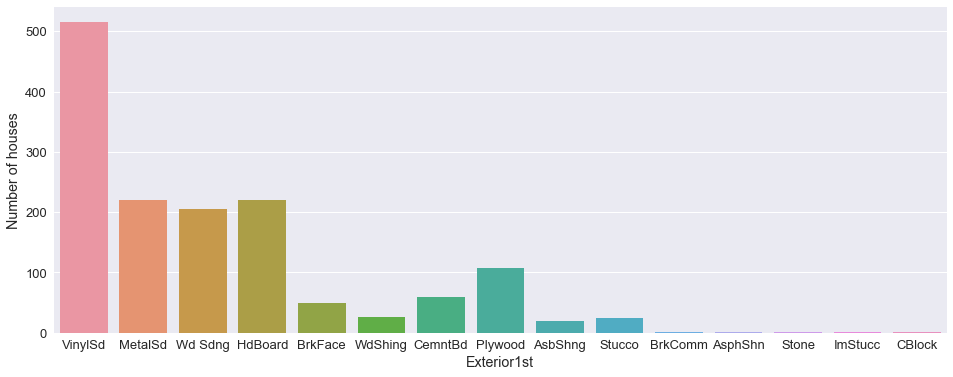

In [537]:
sns.set(font_scale = 1.3)
ax = plt.subplots(figsize=(16, 6))
ax = sns.countplot(x="Exterior1st", data=train)
_ = ax.set_ylabel("Number of houses")
_ = ax.set_xlabel("Exterior1st")





# 9.ExterCond: 

The following variable describes the present condition of the material on the exterior. It is ordinal
and the below values describe each of these conditions. Most of the houses in our dataset have an average exterior condition. 

Ex = Excellent

Gd = Good 

TA = Average/Typical

Fa = Fair

Po = Poor 


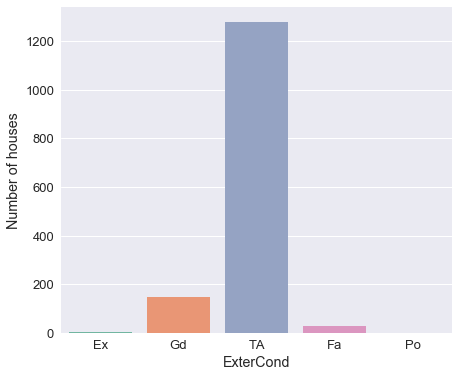

In [538]:
sns.set(font_scale = 1.3)
labels = ["Ex","Gd","TA","Fa","Po"]
ax = plt.subplots(figsize=(7, 6))
ax = sns.countplot(x="ExterCond", data=train , palette ="Set2", order = labels)
_ = ax.set_ylabel("Number of houses")

		
# 10.CentralAir: 

This attribute describes whether a house has Central air conditioning or not. This feature is very relevant in places with terrible heat and humidity. 



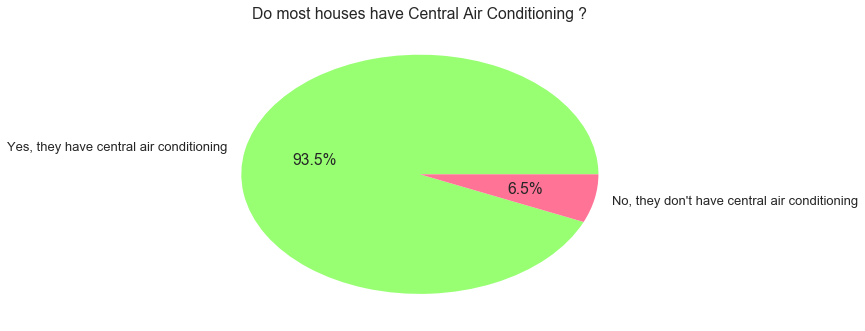

In [539]:
sns.set(font_scale =1.3)
y = train.CentralAir[train.CentralAir =="Y"].count()
n  = train.CentralAir[train.CentralAir =="N"].count()
slices =[y,n]
labels = ["Yes, they have central air conditioning","No, they don't have central air conditioning"]
plt.pie(slices,labels=labels, autopct='%1.1f%%',colors=["#98ff73","#ff7396"])
plt.title("Do most houses have Central Air Conditioning ?")


# 11.HalfBath: Half baths above grade


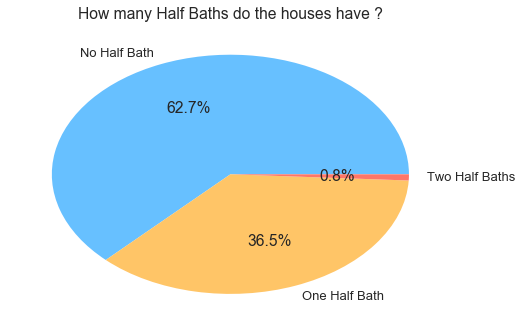

In [540]:
sns.set(font_scale =1.3)
zero = train.HalfBath[train.HalfBath ==0].count()
one = train.HalfBath[train.HalfBath ==1].count()
two = train.HalfBath[train.HalfBath ==2].count()
slices = [zero,one,two]
labels1 = ["No Half Bath","One Half Bath","Two Half Baths"]
plt.pie(slices,labels=labels1, autopct='%1.1f%%',colors=["#67c0ff","#ffc567","#ff7667"])
plt.title("How many Half Baths do the houses have ?")


## Question 5 : Develop strategies to visually encode combinations of attributes and implement where feasible.

In developing combinations of visual encoding we will first construct a heatmap that will show us the correlation between each attribute and the saleprice. We will also analyze more closely the relationship between  YearBuilt, OverQual and Lot ARea, which are one of the most widely talked about property attributes in popular belief. 

 



In [541]:
train.SalePrice.describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

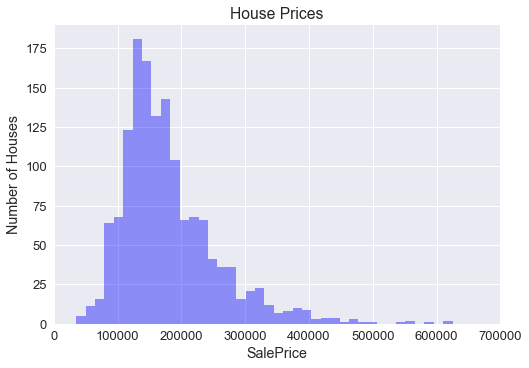

In [542]:
ax = sns.distplot(train.SalePrice  ,color="b", kde=False)
_ = ax.set_title('House Prices')
#_ = ax.set_xticks(ticks)
_ = ax.set_xlim(0,700000)

_= ax.set(xlabel='SalePrice', ylabel='Number of Houses')


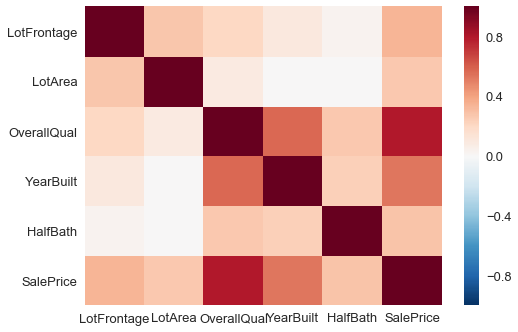

In [543]:
selected_attributes2 = ["MSZoning", "LotFrontage", "LotArea", 
                       "Alley", "OverallQual", "YearBuilt", "RoofStyle", "Exterior1st",
                       "ExterCond", "CentralAir", "HalfBath","SalePrice"]
correlation = train[selected_attributes2].corr()
ax = sns.heatmap(correlation, center=0)

#  Plot the relationship between the Sale price and OverallQuality

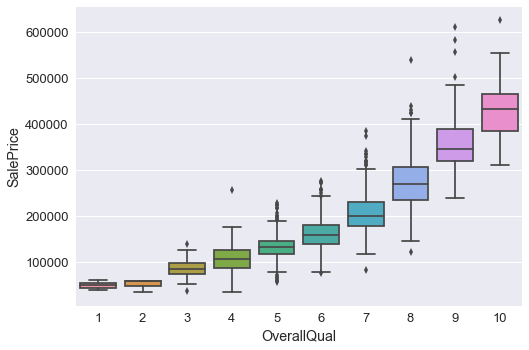

In [544]:
sns.boxplot(x="OverallQual", y="SalePrice", data=train)

# Plot the relationship between SalePrice and LotArea

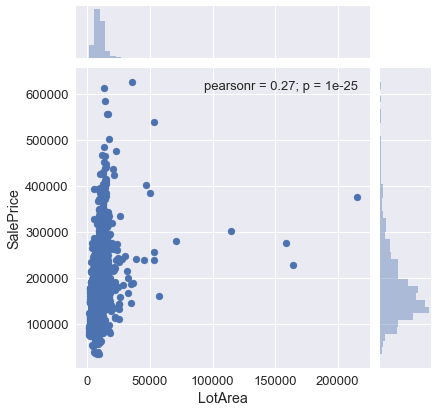

In [561]:
sns.jointplot(x="LotArea", y="SalePrice", data=train)


# Plot the relationship between Overall Quality, the Year Built  and HalfBath

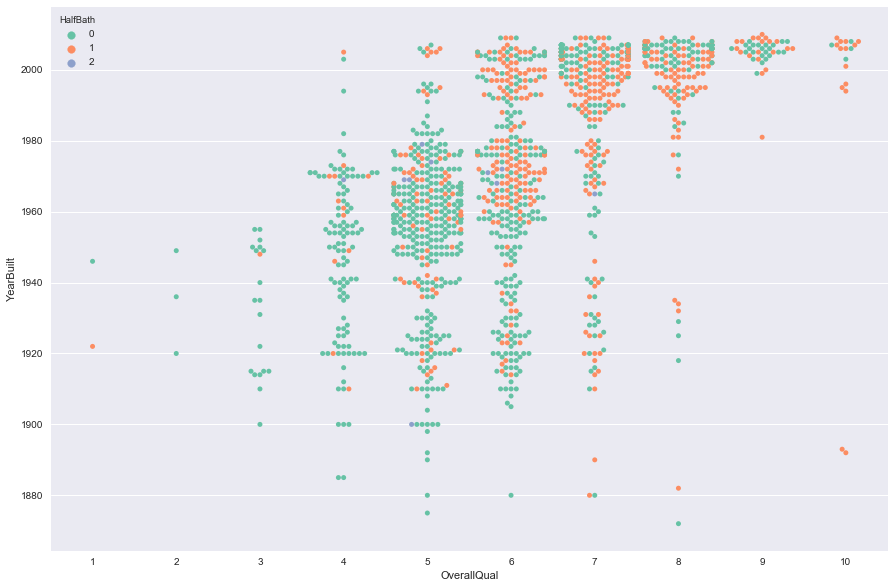

In [320]:
ax = plt.subplots(figsize=(15, 10))
ax =sns.swarmplot(y="YearBuilt",x = "OverallQual", hue="HalfBath", data=train, palette="Set2")

## Question 5 : What Questions can be answered with the visual encoding ? 

### Answer:
The 11 selected attributes describe quantitative and qualitative information that a typical home buyer would like to know when considering a potential home purchase. 

#### Individual plots can give an answer to the following questions : 
When was the house built ? 
How big is the lot ? 
How big is the area in front of the house ? 
Is the house in good condition ? 
What style is the roof ? 
Does it have central air conditionining ? 
Is the house located in a low density area or not ? 

#### Individual plots can give an answer to the following questions : 
Since the dependent variable is SalePrice, we are interested in the degree of influence of each of these attributes on the SalePrice. 

Is there a relationship between the SalePrice and each of these attributes ? 
Are there correlations between the independent attributes ? For example how is the overall condition of old houses vs. new ones ? 


## Question 6: Key Findings


#### The houses in our dataset are upscale : 

The<b> LotFrontage </b> attribute infers that the houses in our dataset belong to an upscale neighborhood, since the mean value of LotFrontage is 70 sqft. Since it determines how much noice and pollution might travel to the residence from the street. This finding is confirmed by the <b>MSZoning</b> attribute which indicates that 78% of the houses in our dataset belong to a low density zone. High end neighborhood tend to be less populated than poorer ones. 

Moreover, the average house area in our dataset is 10448 sqft which is almost 5 times the [average home size in the US] (http://money.cnn.com/2014/06/04/real_estate/american-home-size/index.html).

#### The houses were mostly built in 2000 and have an above average overall quality score: 

A quarter of our dataset was built after 2006. And more than 63% of the houses have an Overall Quality score of more than 5. These last attributes are often used by potential home buyers to estimate the cost of future house maintenance or renovation. 

#### The houses in our dataset should sell at a higher price than the market average. 

Before analyzing the pairwise relationships, we needed to look at the SalePrice distribuion - the dependent variable, in order to verify whether the houses prices. This fact can be confirmed since the mean house price is at 180151 USD and the median at 163000 USD.  

#### OverallQual and YearBuilt are highly correlated with SalePrice . 

Plotting the covariance matrix, allowed us to identify the two most highly correlated  attributes with SalePrice namely OverallQual at 0.8, and YearBuilt at 0.53. 

#### Increasing the house area doesn't necessarily increase the price. 

The joint plot between SalesPrice and LotArea shows that house prices increase without a significant increase in lotarea. Thus, the low correlation score of 0.27.


#### Most of the houses with an Overall Qual score of more than 6 have been built around in the 2000s and have on halfbath:
Equipping houses with Half Baths which refers to having a toilet and a sink solely. The swarmplot shows that adding this feature to a house started in the 1960. Most of the houses with an overall condition score of more than 6 have a halfbath. HalfBaths are usually reserved for guests. This implies that home owners with this feature have a confortable income level that allows them to host visitors. 
